In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!ls /content/drive/My\ Drive

'Colab Notebooks'  'Getting started.pdf'  'My Drive'


In [5]:
!mkdir -p "/content/drive/My Drive/movie-ratings-analysis/data"
!mkdir -p "/content/drive/My Drive/movie-ratings-analysis/notebooks"
!mkdir -p "/content/drive/My Drive/movie-ratings-analysis/visualizations"

In [6]:
!ls "/content/drive/My Drive/movie-ratings-analysis"

data  notebooks  visualizations


In [7]:
!pip install pandas numpy matplotlib seaborn

In [9]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/movie-ratings-analysis/data/imdb_top_1000.csv')
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [10]:
df.info()
df.head()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


(1000, 16)

In [11]:
df.rename(columns={
    'Series_Title': 'Title',
    'Released_Year': 'Year',
    'IMDB_Rating': 'Rating',
    'No_of_Votes': 'Votes',
    'Gross': 'Gross_Earnings'
}, inplace=True)

df.head()

,Poster_Link,Title,Year,Certificate,Runtime,Genre,Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,Votes,Gross_Earnings
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [12]:
df.isnull().sum()

,0
Poster_Link,0
Title,0
Year,0
Certificate,101
Runtime,0
Genre,0
Rating,0
Overview,0
Meta_score,157
Director,0


In [14]:
df['Certificate'].fillna('Not Rated', inplace=True)
df['Gross_Earnings'].fillna('NaN', inplace=True)
# Drop rows where Year or Rating is missing
df.dropna(subset=['Year', 'Rating'], inplace=True)

df.isnull().sum()

/tmp/ipython-input-14-2789697744.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Certificate'].fillna('Not Rated', inplace=True)
/tmp/ipython-input-14-2789697744.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

,0
Poster_Link,0
Title,0
Year,0
Certificate,0
Runtime,0
Genre,0
Rating,0
Overview,0
Meta_score,157
Director,0


In [15]:
df.drop_duplicates(inplace=True)
print("Shape after removing duplicates:", df.shape)

Shape after removing duplicates: (1000, 16)


In [26]:
# Convert Year to int
df['Year'] = df['Year'].astype(int)

# Clean Gross_Earnings (remove commas, convert to float)
df['Gross_Earnings'] = df['Gross_Earnings'].str.replace(',', '')
df['Gross_Earnings'] = pd.to_numeric(df['Gross_Earnings'], errors='coerce')  # NaN if missing

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 0 to 999
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Poster_Link     999 non-null    object 
 1   Title           999 non-null    object 
 2   Year            999 non-null    int64  
 3   Certificate     999 non-null    object 
 4   Runtime         999 non-null    object 
 5   Genre           999 non-null    object 
 6   Rating          999 non-null    float64
 7   Overview        999 non-null    object 
 8   Meta_score      842 non-null    float64
 9   Director        999 non-null    object 
 10  Star1           999 non-null    object 
 11  Star2           999 non-null    object 
 12  Star3           999 non-null    object 
 13  Star4           999 non-null    object 
 14  Votes           999 non-null    int64  
 15  Gross_Earnings  830 non-null    float64
dtypes: float64(3), int64(2), object(11)
memory usage: 132.7+ KB


In [18]:
# As Year column contains mixed data we perform this to execute line19 code
#Convert Year to numeric, set invalid entries as NaN
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Drop rows where Year is NaN
df.dropna(subset=['Year'], inplace=True)

# Convert to int now
df['Year'] = df['Year'].astype(int)

In [25]:
df.dtypes

,0
Poster_Link,object
Title,object
Year,int64
Certificate,object
Runtime,object
Genre,object
Rating,float64
Overview,object
Meta_score,float64
Director,object


In [27]:
# Basic Dataset Overview
df.shape

#Column names & types
df.info()

#Summary statistics
df.describe()

#Null value check
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 0 to 999
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Poster_Link     999 non-null    object 
 1   Title           999 non-null    object 
 2   Year            999 non-null    int64  
 3   Certificate     999 non-null    object 
 4   Runtime         999 non-null    object 
 5   Genre           999 non-null    object 
 6   Rating          999 non-null    float64
 7   Overview        999 non-null    object 
 8   Meta_score      842 non-null    float64
 9   Director        999 non-null    object 
 10  Star1           999 non-null    object 
 11  Star2           999 non-null    object 
 12  Star3           999 non-null    object 
 13  Star4           999 non-null    object 
 14  Votes           999 non-null    int64  
 15  Gross_Earnings  830 non-null    float64
dtypes: float64(3), int64(2), object(11)
memory usage: 132.7+ KB


,0
Poster_Link,0
Title,0
Year,0
Certificate,0
Runtime,0
Genre,0
Rating,0
Overview,0
Meta_score,157
Director,0


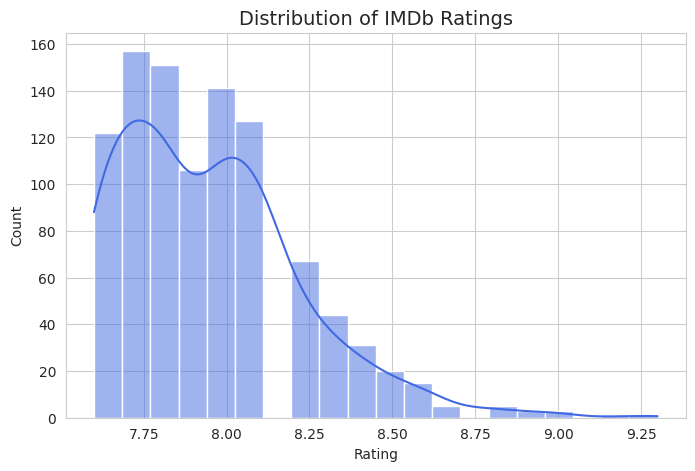

In [30]:
 #Univariate Analysis
#Univariate means analyzing one column at a time.
import seaborn as sns
import matplotlib.pyplot as plt


sns.set_style("whitegrid")
plt.figure(figsize=(8,5))

sns.histplot(df['Rating'], bins=20, kde=True, color='royalblue')
plt.title('Distribution of IMDb Ratings', fontsize=14)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [65]:
plt.savefig('/content/drive/My Drive/movie-ratings-analysis/visualizations/IMDb_distribution.png')

<Figure size 640x480 with 0 Axes>

/tmp/ipython-input-31-3676007065.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Genre', data=df, order=df['Genre'].value_counts().index, palette='viridis')


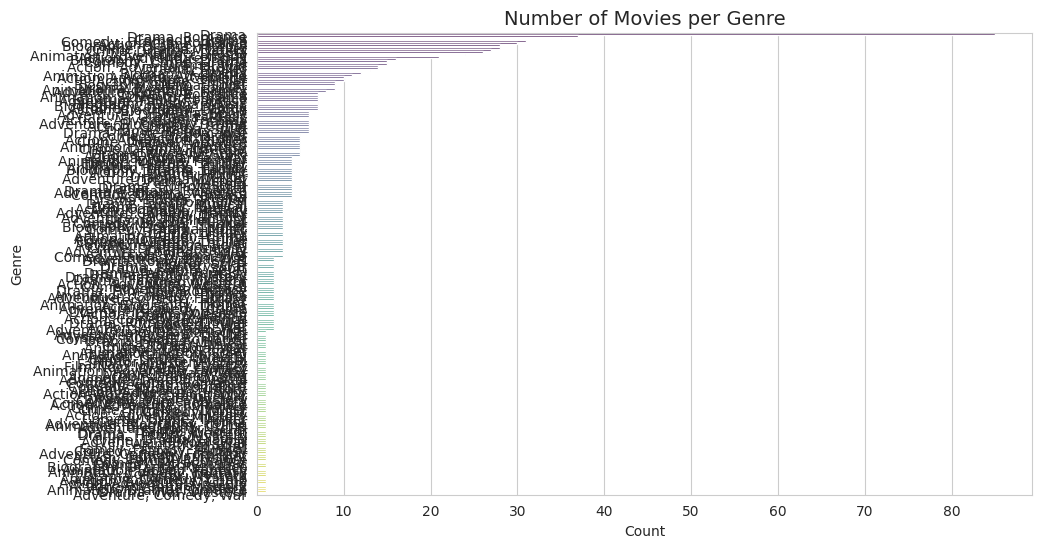

In [31]:
plt.figure(figsize=(10,6))
sns.countplot(y='Genre', data=df, order=df['Genre'].value_counts().index, palette='viridis')
plt.title('Number of Movies per Genre', fontsize=14)
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

In [55]:
plt.savefig('/content/drive/My Drive/movie-ratings-analysis/visualizations/MoviesperGener.png')

<Figure size 640x480 with 0 Axes>

In [33]:
# To clear the clumpsy look for the above graph

# Split genres and count individually
from collections import Counter

# Create a list of all genres
all_genres = df['Genre'].str.split(',').sum()
all_genres = [g.strip() for g in all_genres]  # Remove extra spaces

# Count occurrences
genre_counts = Counter(all_genres)

In [34]:
import pandas as pd

genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False)
genre_df.head()

,Genre,Count
0,Drama,723
10,Comedy,233
1,Crime,209
3,Adventure,195
2,Action,189


/tmp/ipython-input-35-1564976008.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Genre', x='Count', data=genre_df, palette='coolwarm')


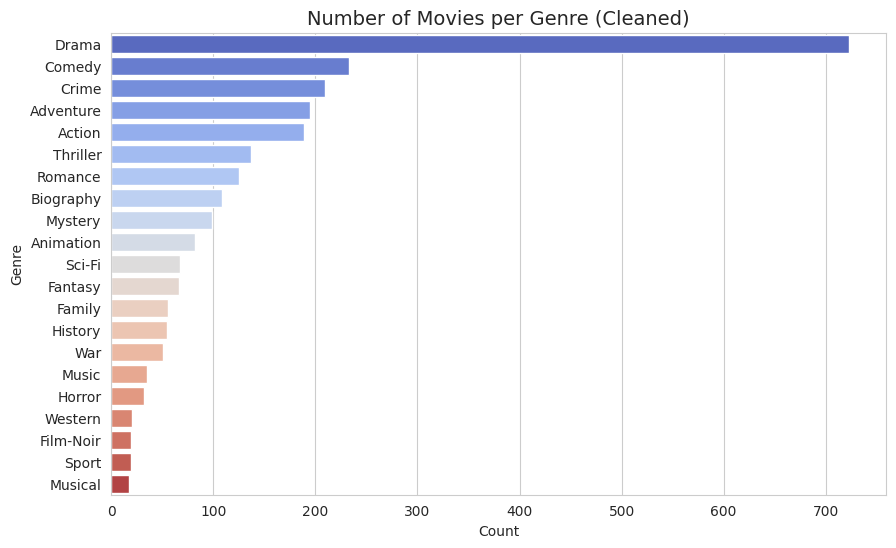

In [35]:
plt.figure(figsize=(10,6))
sns.barplot(y='Genre', x='Count', data=genre_df, palette='coolwarm')
plt.title('Number of Movies per Genre (Cleaned)', fontsize=14)
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

In [54]:
plt.savefig('/content/drive/My Drive/movie-ratings-analysis/visualizations/MoviesPerGener_distribution.png')

<Figure size 640x480 with 0 Axes>

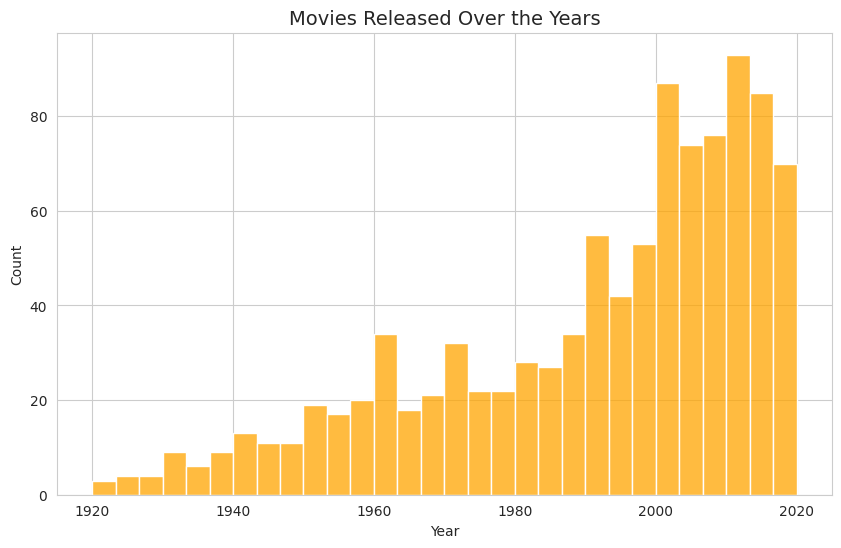

In [32]:
plt.figure(figsize=(10,6))
sns.histplot(df['Year'], bins=30, kde=False, color='orange')
plt.title('Movies Released Over the Years', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

In [64]:
plt.savefig('/content/drive/My Drive/movie-ratings-analysis/visualizations/movies_released.png')

<Figure size 640x480 with 0 Axes>

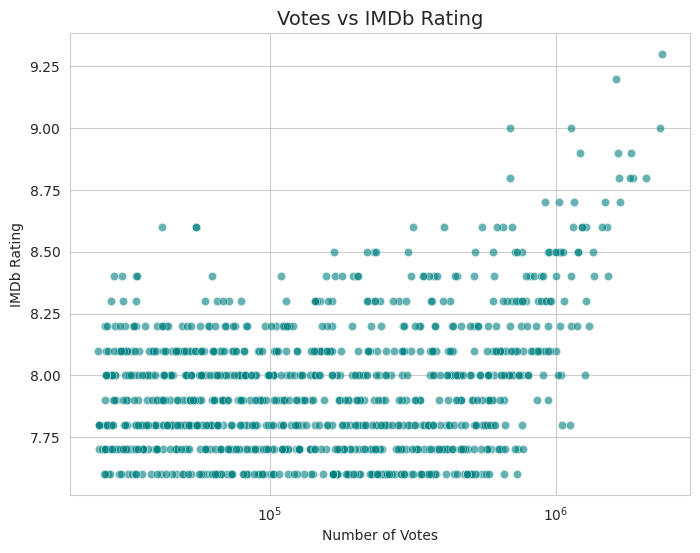

In [36]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Votes', y='Rating', data=df, alpha=0.6, color='teal')
plt.title('Votes vs IMDb Rating', fontsize=14)
plt.xlabel('Number of Votes')
plt.ylabel('IMDb Rating')
plt.xscale('log')  # Because votes have huge range
plt.show()

In [63]:
plt.savefig('/content/drive/My Drive/movie-ratings-analysis/visualizations/VotesVSIMDb_distribution.png')


<Figure size 640x480 with 0 Axes>

In [37]:
df['Genre'] = df['Genre'].apply(lambda x: x.split(', '))
df.head()

,Poster_Link,Title,Year,Certificate,Runtime,Genre,Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,Votes,Gross_Earnings
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,[Drama],9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"[Crime, Drama]",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"[Action, Crime, Drama]",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"[Crime, Drama]",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"[Crime, Drama]",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0


In [38]:
df_exploded = df.explode('Genre')
df_exploded.head()

,Poster_Link,Title,Year,Certificate,Runtime,Genre,Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,Votes,Gross_Earnings
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,Crime,9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,Drama,9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,Action,9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,Crime,9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0


In [39]:
df_exploded['Genre'].value_counts().head(10)

,count
Genre,
Drama,723
Comedy,233
Crime,209
Adventure,195
Action,189
Thriller,137
Romance,125
Biography,109
Mystery,99


/tmp/ipython-input-40-263734655.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Genre', data=df_exploded, order=df_exploded['Genre'].value_counts().index, palette='mako')


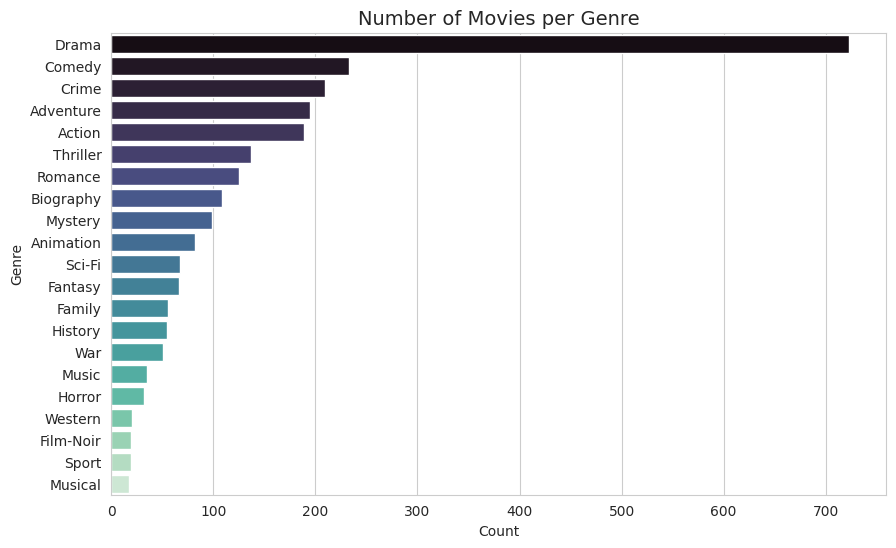

In [40]:
plt.figure(figsize=(10,6))
sns.countplot(y='Genre', data=df_exploded, order=df_exploded['Genre'].value_counts().index, palette='mako')
plt.title('Number of Movies per Genre', fontsize=14)
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

In [62]:
plt.savefig('/content/drive/My Drive/movie-ratings-analysis/visualizations/movieper Genre_distribution.png')

<Figure size 640x480 with 0 Axes>

/tmp/ipython-input-41-3643469104.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Genre', y='Rating', data=df_exploded, palette='coolwarm')


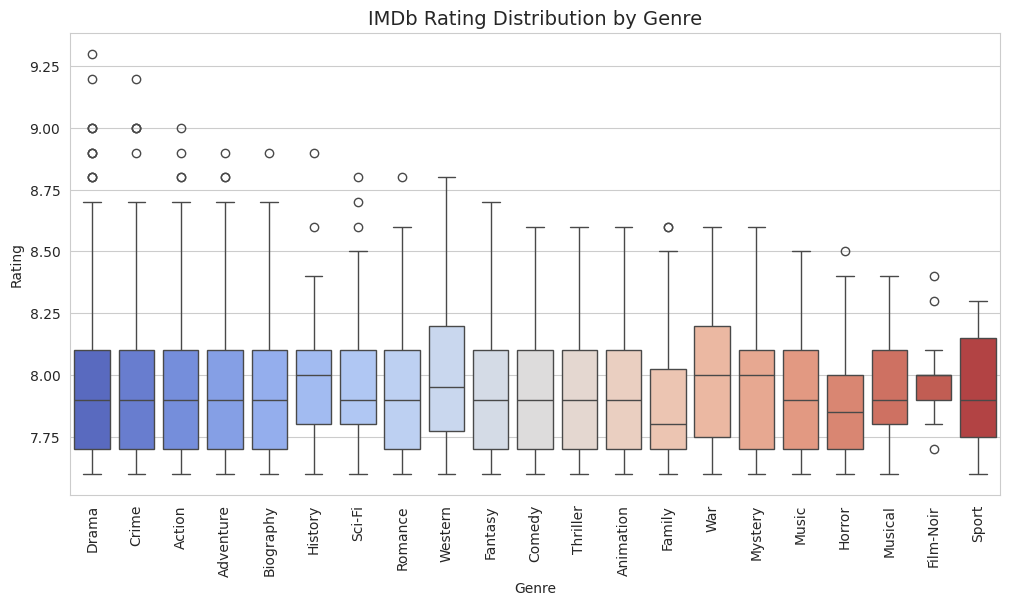

In [41]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Genre', y='Rating', data=df_exploded, palette='coolwarm')
plt.title('IMDb Rating Distribution by Genre', fontsize=14)
plt.xticks(rotation=90)
plt.show()

In [61]:
plt.savefig('/content/drive/My Drive/movie-ratings-analysis/visualizations/IMDbrating_distribution.png')

<Figure size 640x480 with 0 Axes>

In [42]:
# Top 10 Movies by Rating
top_movies = df.sort_values(by='Rating', ascending=False).head(10)
top_movies[['Title', 'Rating', 'Year', 'Genre']]

,Title,Rating,Year,Genre
0,The Shawshank Redemption,9.3,1994,[Drama]
1,The Godfather,9.2,1972,"[Crime, Drama]"
4,12 Angry Men,9.0,1957,"[Crime, Drama]"
2,The Dark Knight,9.0,2008,"[Action, Crime, Drama]"
3,The Godfather: Part II,9.0,1974,"[Crime, Drama]"
5,The Lord of the Rings: The Return of the King,8.9,2003,"[Action, Adventure, Drama]"
7,Schindler's List,8.9,1993,"[Biography, Drama, History]"
6,Pulp Fiction,8.9,1994,"[Crime, Drama]"
8,Inception,8.8,2010,"[Action, Adventure, Sci-Fi]"
12,"Il buono, il brutto, il cattivo",8.8,1966,[Western]


In [43]:
# Top 10 Movies by Votes
top_votes = df.sort_values(by='Votes', ascending=False).head(10)
top_votes[['Title', 'Votes', 'Rating']]

,Title,Votes,Rating
0,The Shawshank Redemption,2343110,9.3
2,The Dark Knight,2303232,9.0
8,Inception,2067042,8.8
9,Fight Club,1854740,8.8
6,Pulp Fiction,1826188,8.9
11,Forrest Gump,1809221,8.8
14,The Matrix,1676426,8.7
10,The Lord of the Rings: The Fellowship of the Ring,1661481,8.8
5,The Lord of the Rings: The Return of the King,1642758,8.9
1,The Godfather,1620367,9.2


In [60]:
plt.savefig('/content/drive/My Drive/movie-ratings-analysis/visualizations/Top10_movies.png')

<Figure size 640x480 with 0 Axes>

In [44]:
#  Top 10 Directors by Average Rating
top_directors = df.groupby('Director')['Rating'].mean().sort_values(ascending=False).head(10)
print(top_directors)

Director
Frank Darabont        8.95
Lana Wachowski        8.70
Irvin Kershner        8.70
Masaki Kobayashi      8.60
Fernando Meirelles    8.60
George Lucas          8.60
Sudha Kongara         8.60
Thomas Kail           8.60
Roberto Benigni       8.60
Milos Forman          8.50
Name: Rating, dtype: float64


In [45]:
# Top Genres by Average Rating
top_genres = df_exploded.groupby('Genre')['Rating'].mean().sort_values(ascending=False).head(10)
print(top_genres)

Genre
War          8.013725
Western      8.000000
Film-Noir    7.989474
Sci-Fi       7.977612
Mystery      7.967677
History      7.960000
Drama        7.959889
Crime        7.954545
Adventure    7.953846
Action       7.948677
Name: Rating, dtype: float64


In [59]:
plt.savefig('/content/drive/My Drive/movie-ratings-analysis/visualizations/Avg_rating.png')


<Figure size 640x480 with 0 Axes>

In [46]:
# Keep only numeric columns -- Correlation matrix
numeric_cols = ['Rating', 'Votes', 'Gross_Earnings']
corr = df[numeric_cols].corr()
print(corr)

                  Rating     Votes  Gross_Earnings
Rating          1.000000  0.495361        0.097490
Votes           0.495361  1.000000        0.574877
Gross_Earnings  0.097490  0.574877        1.000000


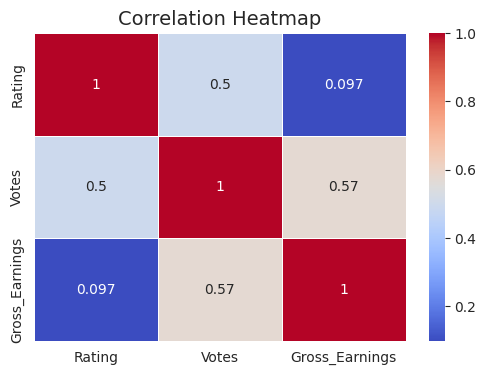

In [47]:
# plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=14)
plt.show()

In [49]:
plt.savefig('/content/drive/My Drive/movie-ratings-analysis/visualizations/rating_distribution.png')

<Figure size 640x480 with 0 Axes>

In [66]:
!pip freeze > requirements.txt

In [67]:
!mv requirements.txt /content/drive/My\ Drive/movie-ratings-analysis/

In [71]:
!apt-get install git

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.15).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [72]:
!git config --global user.name "PrasannaY"
!git config --global user.email "prasannayekkaladevi@gmail.com"

In [76]:
!git clone https://github.com/prasannayekkaladevi/movie-ratings-analysis.git

Cloning into 'movie-ratings-analysis'...


In [78]:
!cp -r /content/drive/My\ Drive/movie-ratings-analysis/* movie-ratings-analysis/


cp: cannot open '/content/drive/My Drive/movie-ratings-analysis/FlowChart.gdoc' for reading: Operation not supported
cp: cannot open '/content/drive/My Drive/movie-ratings-analysis/README.md.gdoc' for reading: Operation not supported
